# Explore here

In [48]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [49]:
df.drop_duplicates()
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [51]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column+'_num'] = pd.factorize(df[column])[0]

In [52]:
df2 = df.drop(['COUNTY_NAME','STATE_NAME'], axis = 1)

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to STATE_NAME_num
dtypes: float64(61), int64(47)
memory usage: 2.6 MB


In [54]:
# Variables numéricas
numeric_vars = df2.select_dtypes(include='number').columns.tolist()

# Variables categóricas
categorical_vars = df2.select_dtypes(exclude='number').columns.tolist()

print("Variables numéricas:")
print(numeric_vars)

print("\nVariables categóricas:")
print(categorical_vars)

Variables numéricas:
['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Perce

#como busco una variable objetivo cuando tengo muchas variables?

In [55]:
# Mostrar todas las columnas
print(df.columns)

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'diabetes_number',
       'CKD_prevalence', 'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code', 'COUNTY_NAME_num', 'STATE_NAME_num'],
      dtype='object', length=110)


In [56]:
# Convertir los nombres de las columnas a una lista
all_columns = df.columns.tolist()

# Imprimir la lista completa
print(all_columns)

['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with les

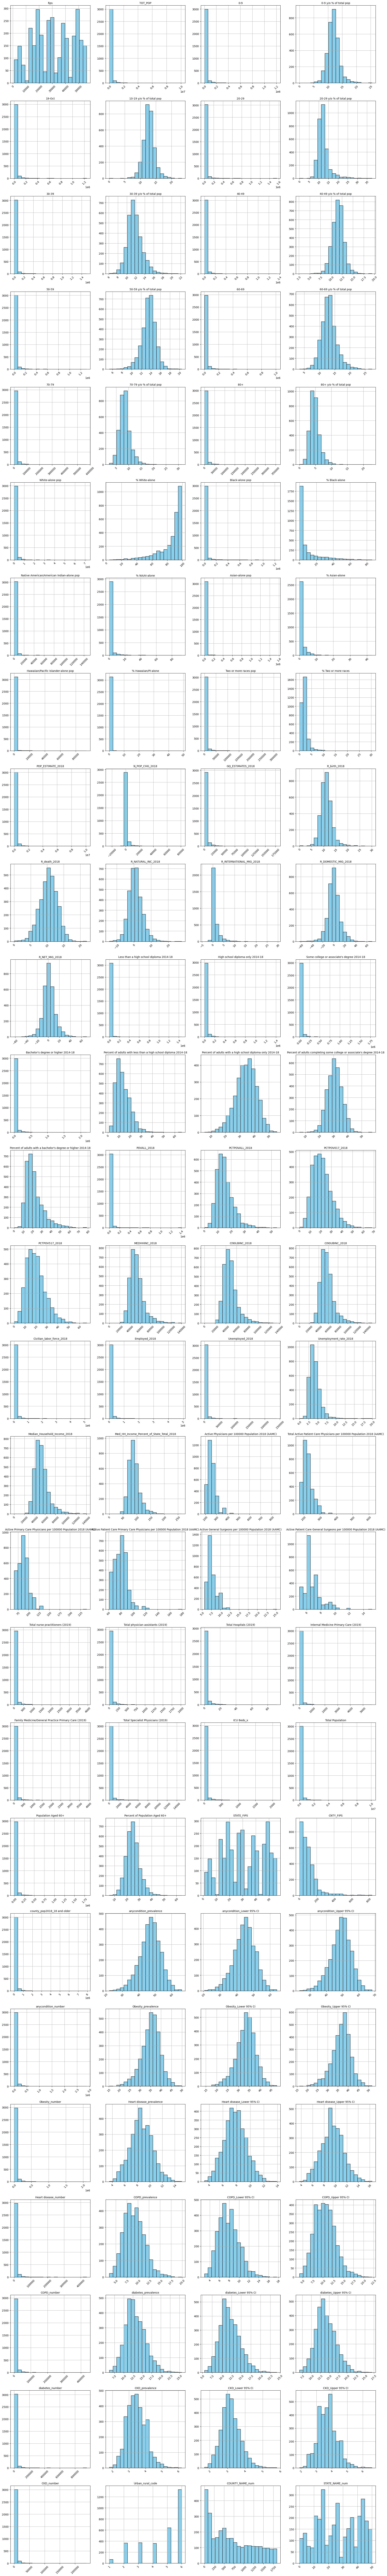

In [57]:
import matplotlib.pyplot as plt
import math
# Número de columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(numeric_columns)

# Configurar el número de filas y columnas
cols_per_row = 4  # Máximo 4 gráficos por fila
rows = math.ceil(num_plots / cols_per_row)  # Calcular el número de filas necesarias

# Crear una figura con subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, 5 * rows))
axes = axes.flatten()  # Aplanar el array de ejes para facilitar el acceso

# Iterar sobre las columnas numéricas y graficar
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    df[column].hist(ax=ax, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(column, fontsize=10)  # Título del gráfico (nombre de la columna)
    ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x si son largas

# Ocultar ejes vacíos si hay más subplots que columnas
for j in range(num_plots, len(axes)):
    axes[j].axis('off')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

In [58]:
# Supongamos que tu variable objetivo es 'Target'
target_column = 'diabetes_prevalence'  # Cambia esto por el nombre de tu variable objetivo

# Calcular la correlación de cada columna numérica con la variable objetivo
correlations = df[numeric_columns].corrwith(df[target_column])

# Ordenar las correlaciones de mayor a menor
correlations_sorted = correlations.abs().sort_values(ascending=False)

# Mostrar las columnas más correlacionadas
print(correlations_sorted.head(30))  # Muestra las 30 columnas más correlacionadas

diabetes_prevalence                                               1.000000
diabetes_Upper 95% CI                                             0.998409
diabetes_Lower 95% CI                                             0.998069
CKD_Lower 95% CI                                                  0.924630
CKD_prevalence                                                    0.918514
CKD_Upper 95% CI                                                  0.906711
anycondition_Lower 95% CI                                         0.856473
Heart disease_Lower 95% CI                                        0.855832
anycondition_prevalence                                           0.850219
anycondition_Upper 95% CI                                         0.842287
PCTPOV017_2018                                                    0.840088
PCTPOV517_2018                                                    0.833527
Heart disease_prevalence                                          0.831021
COPD_Lower 95% CI        

In [59]:
# Obtener los nombres de las 30 columnas más correlacionadas
selected_columns = correlations_sorted.head(30).index.tolist()

# Incluir la variable objetivo en el nuevo dataset
selected_columns.append(target_column)

# Mostrar las columnas seleccionadas
print("Columnas seleccionadas:", selected_columns)

# Crear un nuevo dataset con las columnas seleccionadas
df = df[selected_columns]

# Mostrar las primeras filas del nuevo dataset
print(df.head()) #df_selected=variable objetivo diabetes_prevalence


Columnas seleccionadas: ['diabetes_prevalence', 'diabetes_Upper 95% CI', 'diabetes_Lower 95% CI', 'CKD_Lower 95% CI', 'CKD_prevalence', 'CKD_Upper 95% CI', 'anycondition_Lower 95% CI', 'Heart disease_Lower 95% CI', 'anycondition_prevalence', 'anycondition_Upper 95% CI', 'PCTPOV017_2018', 'PCTPOV517_2018', 'Heart disease_prevalence', 'COPD_Lower 95% CI', 'Heart disease_Upper 95% CI', 'COPD_prevalence', 'COPD_Upper 95% CI', 'PCTPOVALL_2018', 'MEDHHINC_2018', 'Median_Household_Income_2018', 'CI90LBINC_2018', 'CI90UBINC_2018', 'Obesity_Lower 95% CI', 'Obesity_prevalence', 'Percent of adults with less than a high school diploma 2014-18', 'Obesity_Upper 95% CI', "Percent of adults with a bachelor's degree or higher 2014-18", 'Med_HH_Income_Percent_of_State_Total_2018', 'R_death_2018', 'Unemployment_rate_2018', 'diabetes_prevalence']
   diabetes_prevalence  diabetes_Upper 95% CI  diabetes_Lower 95% CI  \
0                 12.9                   13.8                   11.9   
1                

In [60]:
# Verificar la información del nuevo dataset
print(df.info())

# Verificar las estadísticas descriptivas
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 31 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   diabetes_prevalence                                             3140 non-null   float64
 1   diabetes_Upper 95% CI                                           3140 non-null   float64
 2   diabetes_Lower 95% CI                                           3140 non-null   float64
 3   CKD_Lower 95% CI                                                3140 non-null   float64
 4   CKD_prevalence                                                  3140 non-null   float64
 5   CKD_Upper 95% CI                                                3140 non-null   float64
 6   anycondition_Lower 95% CI                                       3140 non-null   float64
 7   Heart disease_Lower 95% CI                         

In [61]:
# Eliminar espacios en blanco y caracteres especiales
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')

In [62]:
# Mostrar los tipos de datos de todas las columnas
print(df.dtypes)

diabetes_prevalence                                               float64
diabetes_Upper_95%_CI                                             float64
diabetes_Lower_95%_CI                                             float64
CKD_Lower_95%_CI                                                  float64
CKD_prevalence                                                    float64
CKD_Upper_95%_CI                                                  float64
anycondition_Lower_95%_CI                                         float64
Heart_disease_Lower_95%_CI                                        float64
anycondition_prevalence                                           float64
anycondition_Upper_95%_CI                                         float64
PCTPOV017_2018                                                    float64
PCTPOV517_2018                                                    float64
Heart_disease_prevalence                                          float64
COPD_Lower_95%_CI                     

In [67]:
for column in df.columns:
    if 'diabetes' in column:
        if column != 'diabetes_prevalence':
            print(column)
            df.drop(column,axis=1,inplace=True)

diabetes_Upper_95%_CI
diabetes_Lower_95%_CI


/tmp/ipykernel_12617/2315874160.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column,axis=1,inplace=True)
/tmp/ipykernel_12617/2315874160.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column,axis=1,inplace=True)


In [68]:
from sklearn.model_selection import train_test_split

X = df.drop(['diabetes_prevalence'],axis=1)
y = df['diabetes_prevalence']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

X_train

,CKD_Lower_95%_CI,CKD_prevalence,CKD_Upper_95%_CI,anycondition_Lower_95%_CI,Heart_disease_Lower_95%_CI,anycondition_prevalence,anycondition_Upper_95%_CI,PCTPOV017_2018,PCTPOV517_2018,Heart_disease_prevalence,...,CI90LBINC_2018,CI90UBINC_2018,Obesity_Lower_95%_CI,Obesity_prevalence,Percent_of_adults_with_less_than_a_high_school_diploma_2014_18,Obesity_Upper_95%_CI,Percent_of_adults_with_a_bachelor's_degree_or_higher_2014_18,Med_HH_Income_Percent_of_State_Total_2018,R_death_2018,Unemployment_rate_2018
1292,3.5,3.8,4.1,47.3,9.1,49.7,51.9,23.3,21.3,10.1,...,47914,52834,36.8,38.6,14.1,40.4,18.8,88.9,10.0,6.1
2302,3.2,3.5,3.8,44.0,8.2,46.7,49.2,20.9,18.8,9.2,...,43018,48504,31.3,33.2,10.2,35.1,17.6,75.2,13.1,4.9
761,2.7,2.9,3.1,44.9,6.6,47.0,49.1,14.8,13.3,7.3,...,50857,58579,32.1,33.7,10.8,35.4,16.1,98.2,9.2,3.8
2194,2.8,3.0,3.2,44.9,7.1,46.9,48.7,12.5,10.8,7.8,...,58266,65432,35.1,36.5,7.9,38.1,24.3,119.1,9.1,3.3
1241,3.2,3.4,3.6,46.0,7.7,48.0,49.8,27.6,25.2,8.4,...,45124,51702,36.1,37.5,8.9,39.0,21.2,85.5,10.3,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,2.3,2.5,2.7,35.4,5.2,37.7,40.0,7.1,5.8,5.8,...,70990,79852,30.6,32.6,5.2,34.5,28.2,124.1,7.1,3.2
1095,2.4,2.6,2.8,46.5,6.3,49.0,51.4,10.9,10.2,6.9,...,68261,78739,35.2,37.2,9.6,39.2,28.6,146.4,7.5,3.3
1130,3.8,4.0,4.3,51.1,9.2,52.9,54.7,34.2,32.8,10.0,...,30490,37736,37.5,39.0,25.3,40.5,12.8,71.0,11.4,5.8
1294,4.2,4.5,5.0,49.6,11.7,52.6,55.1,25.0,21.9,13.0,...,37818,43778,34.1,36.3,7.4,38.3,17.5,72.0,19.0,7.8


In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train,y_train)
xtrain_escalados = scaler.transform(X_train)
xtest_escalados = scaler.transform(X_test)

X_train_esc = pd.DataFrame(xtrain_escalados,index=X_train.index,columns=X_train.columns)
X_test_esc = pd.DataFrame(xtest_escalados,index=X_test.index,columns=X_test.columns)

In [70]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

model_rl = LinearRegression()
model_lasso = Lasso()
model_ridge = Ridge()

model_rl.fit(X_train_esc,y_train)
model_lasso.fit(X_train_esc,y_train)
model_ridge.fit(X_train_esc,y_train)

Ridge()

In [71]:
y_pred_rl = model_rl.predict(X_test_esc)
y_pred_lasso = model_lasso.predict(X_test_esc)
y_pred_ridge = model_ridge.predict(X_test_esc)

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"El error de la Regresion Lineal es {mean_squared_error(y_test,y_pred_rl)} y el R2 es de {r2_score(y_test,y_pred_rl)}")
print(f"El error de la Regresion Lasso es {mean_squared_error(y_test,y_pred_lasso)} y el R2 es de {r2_score(y_test,y_pred_lasso)}")
print(f"El error de la Regresion Ridge es {mean_squared_error(y_test,y_pred_ridge)} y el R2 es de {r2_score(y_test,y_pred_ridge)}")

El error de la Regresion Lineal es 0.32830413715222556 y el R2 es de 0.9591821540792376
El error de la Regresion Lasso es 1.8878644228940424 y el R2 es de 0.7652830092200511
El error de la Regresion Ridge es 0.3302412185213932 y el R2 es de 0.9589413179766271


In [73]:
y_pred_rl_train = model_rl.predict(X_train_esc)
print(f"El error de la Regresion Lineal es {mean_squared_error(y_train,y_pred_rl_train)} y el R2 es de {r2_score(y_train,y_pred_rl_train)}")

El error de la Regresion Lineal es 0.32988971186497745 y el R2 es de 0.9545530811371384


In [74]:
import numpy as np
var_x = np.linspace(0,20,100)
var_x

array([ 0.        ,  0.2020202 ,  0.4040404 ,  0.60606061,  0.80808081,
        1.01010101,  1.21212121,  1.41414141,  1.61616162,  1.81818182,
        2.02020202,  2.22222222,  2.42424242,  2.62626263,  2.82828283,
        3.03030303,  3.23232323,  3.43434343,  3.63636364,  3.83838384,
        4.04040404,  4.24242424,  4.44444444,  4.64646465,  4.84848485,
        5.05050505,  5.25252525,  5.45454545,  5.65656566,  5.85858586,
        6.06060606,  6.26262626,  6.46464646,  6.66666667,  6.86868687,
        7.07070707,  7.27272727,  7.47474747,  7.67676768,  7.87878788,
        8.08080808,  8.28282828,  8.48484848,  8.68686869,  8.88888889,
        9.09090909,  9.29292929,  9.49494949,  9.6969697 ,  9.8989899 ,
       10.1010101 , 10.3030303 , 10.50505051, 10.70707071, 10.90909091,
       11.11111111, 11.31313131, 11.51515152, 11.71717172, 11.91919192,
       12.12121212, 12.32323232, 12.52525253, 12.72727273, 12.92929293,
       13.13131313, 13.33333333, 13.53535354, 13.73737374, 13.93

In [75]:
r2_alphas = []
for alpha in var_x:
    model = Lasso(alpha=alpha)
    model.fit(X_train_esc,y_train)
    y_pred = model.predict(X_test_esc)
    r2_alphas.append(r2_score(y_test,y_pred))
r2_alphas

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.168e+02, tolerance: 1.823e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

[0.9587045979546498,
 0.9328552163214543,
 0.9098583073841666,
 0.8722439620407793,
 0.8225135709697167,
 0.7619502571272286,
 0.6903131068433618,
 0.6062208058791458,
 0.5096230750886386,
 0.40162113740619665,
 0.29274277005980576,
 0.17235812077999357,
 0.04046718956675932,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877,
 -0.0031556485192771877

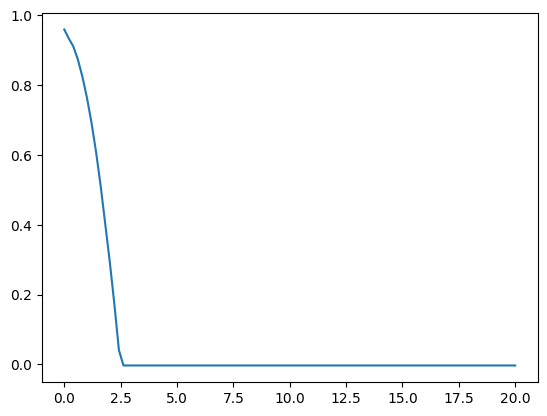

In [76]:
import matplotlib.pyplot as plt

plt.plot(var_x,r2_alphas)
plt.show()